# 面向机器智能的TensorFlow实践

### 2.8 测试TensorFlow、Jupyter Notebook及matplotlib

1. 用TensorFlow定义一个由随机数构成的2X20的矩阵，并将其赋给变量a。
2. 启动TensorFlow Session，并将其赋予一个sess对象。
3. 用sess.run()方法执行对象a，并将输出（NumPy数组）赋给out。
4. 将这个2X20的矩阵划分为两个1X10的向量x和y。
5. 利用pyplot模块绘制散点图，x对应横轴，y对应纵轴。

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

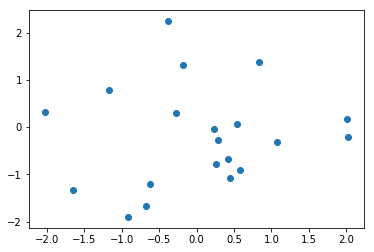

In [40]:
%matplotlib inline 
a = tf.random_normal([2,20])
sess = tf.Session()
out = sess.run(a)
x, y = out

plt.scatter(x, y)
plt.show()
plt.close()

#### 3.2.1 构建第一个TensorFlow数据流图

In [3]:
import tensorflow as tf

a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a, b, name="mul_c")
d = tf.add(a, b, name="add_d")
e = tf.add(c, d, name="add_e")

sess = tf.Session()
output = sess.run(e)

print(output)

23


#### 3.2.4 运算符重载

In [12]:
import tensorflow as tf

a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = a * b
d = a + b
e = c + d

sess = tf.Session()
output = sess.run(e)

sess.close()
print(output)

23


#### 3.2.5 TensorFlow中的Graph对象

In [11]:
import tensorflow as tf

g = tf.Graph()
with g.as_default():
    # 像往常一样创建一些Op；它们将被添加到Graph对象g中
    a = tf.multiply(2, 3)

# 由于不在with语句块中，下面的Op将放置在默认数据流图中
also_in_default_graph = tf.subtract(5,1)

#### 3.2.7 利用占位符点添加输入

占位符的行为与Tensor对象一致，但在创建时无须为它们指定具体的数值。它们的作用是为运行时即将到来的某个Tensor对象预留位置，因此实际上变成了“输入”节点。

In [13]:
import tensorflow as tf
import numpy as np

# 创建一个长度为2、数据类型为int32的占位向量
a = tf.placeholder(tf.int32, shape=[2], name="my_input")

# 将该占位向量视为其他任意Tensor对象，加以使用
b = tf.reduce_prod(a, name="prod_b")
c = tf.reduce_sum(a, name="prod_c")

d = tf.add(b, c, name="add_d")

# 定义一个TensorFlow Session对象
sess = tf.Session()

# 创建一个将传给feed_dict参数的字典
# 键：'a'，指向占位符输出Tensor对象的句柄
# 值：一个值为[5,3]、类型为int32的向量
input_dict = {a: np.array([5,3], dtype=np.int32)}

# 计算d的值，将input_dict的“值”传给a
sess.run(d, feed_dict=input_dict)

23

#### 3.2.8 Variable对象

In [29]:
import tensorflow as tf

# 为Variable对象传入一个初始值3
my_var = tf.Variable(3, name="my_variable")

add = tf.add(5, my_var)
mul = tf.multiply(8, my_var)

sess = tf.Session()
print( sess.run(add, {my_var: 3}) )
print( sess.run(mul, {my_var: 3}) )

8
24


In [30]:
import tensorflow as tf

# 为Variable对象传入一个初始值3
my_var = tf.Variable(3, name="my_variable")

add = tf.add(5, my_var)
mul = tf.multiply(8, my_var)

# init = tf.initialize_all_variables()
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
print( sess.run(add) )
print( sess.run(mul) )

8
24


In [64]:
import tensorflow as tf

# 2x2的零矩阵
zeros = tf.zeros([2, 2])

# 长度为6的全1向量
ones = tf.ones([6])

# 3x3x3的张量，其元素服从0~10的均匀分布
uniform = tf.random_uniform([3, 3, 3], minval=0, maxval=10)

# 3x3x3的张量，其元素服从0均值、标准差为2的正态分布
normal = tf.random_normal([3, 3, 3], mean=0.0, stddev=2.0)

# 3x3x3的张量，其元素服从任何偏离均值不会超过2倍标准差的值，从而可以防止有一个或两个元素与该张量中的其他元素显著不同的情况出现
truncated = tf.truncated_normal([3, 3, 3], mean=5.0, stddev=1.0)

sess = tf.Session()
out_zeros = sess.run(zeros)
out_ones = sess.run(ones)
out_uniform = sess.run(uniform)
out_normal = sess.run(normal)
out_truncated = sess.run(truncated)

print( out_zeros )
print( out_ones )
print( out_uniform )
print( out_normal )
print( out_truncated )

[[ 0.  0.]
 [ 0.  0.]]
[ 1.  1.  1.  1.  1.  1.]
[[[ 8.15243721  9.32383537  5.28775692]
  [ 8.42719269  9.83672714  1.32969856]
  [ 0.14772892  4.36676264  9.90128422]]

 [[ 6.84358358  2.77854204  5.9880867 ]
  [ 9.18852329  7.1083107   5.60181046]
  [ 7.83084488  3.31484318  7.82800579]]

 [[ 9.49655628  6.06481171  2.36369491]
  [ 6.45089149  6.4335227   3.72446537]
  [ 4.1134367   3.40673685  2.61717081]]]
[[[-1.16931629 -2.68397355 -1.72735262]
  [ 0.25375244 -0.48912179 -0.73237044]
  [-0.14452195 -2.37195325  3.06649232]]

 [[-1.83400011 -0.4650743  -1.68667555]
  [ 1.75957501  1.67953122 -0.12990482]
  [ 2.65452886  2.40396762  3.45351481]]

 [[-1.26838553 -0.6958999   0.24704079]
  [-1.3884877  -0.22733845  0.21446256]
  [ 0.92495477  0.59236133 -0.06153692]]]
[[[ 5.52929974  4.37307405  4.78891802]
  [ 4.74285269  6.93629265  4.53819609]
  [ 4.52012014  4.55895758  3.7787745 ]]

 [[ 5.86922026  4.93699646  3.39458871]
  [ 6.13938713  6.62521267  6.0493145 ]
  [ 5.62196541  3

In [74]:
import tensorflow as tf

var1 = tf.Variable(0, name="initialize_me")
var2 = tf.Variable(1, name="no_initialization")

#init = tf.initialize_variables([var1], "init_var1")
init = tf.variables_initializer([var1], "init_var1")

sess = tf.Session()
out = sess.run(init)

print(out)

None


In [77]:
import tensorflow as tf

# 创建一个初值为1的Variable对象
my_var = tf.Variable(1)

# 创建一个Op，使其在每次运行时都将该Variable对象乘以2
my_var_times_two = my_var.assign(my_var * 2)

# 初始化Op
init = tf.global_variables_initializer()

sess = tf.Session()

# 初始化Variable对象
sess.run(init)

# 将Variable对象乘以2，并将其返回
out1 = sess.run(my_var_times_two)
print(out1)
# 输出：2

# 将Variable对象乘以2，并将其返回
out2 = sess.run(my_var_times_two)
print(out2)
# 输出：4

# 将Variable对象乘以2，并将其返回
out3 = sess.run(my_var_times_two)
print(out3)
# 输出：8

2
4
8


In [1]:
import tensorflow as tf

my_var = tf.Variable(1)
out1 = my_var.assign_add(5)
out2 = my_var.assign_sub(2)

# 初始化Op
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
print( sess.run(out1) )
## 6
print( sess.run(out2) )
## 4

# 如果希望将所有Variable对象的值重置为初始值，则只需要再次调用global_variables_initializer，也就是运行sess.run(init)
sess.run(init)
print( sess.run(out2) )
## -1

6
4
-1


### 3.3 通过名称作用域组织数据流图

In [3]:
import tensorflow as tf

graph = tf.Graph()

with graph.as_default():
    in_1 = tf.placeholder(tf.float32, shape=[], name="input_a")
    in_2 = tf.placeholder(tf.float32, shape=[], name="input_b")
    const = tf.constant(3, dtype=tf.float32, name="static_value")
    
    with tf.name_scope("Transformation"):
        
        with tf.name_scope("A"):
            A_mul = tf.multiply(in_1, const)
            A_out = tf.subtract(A_mul, in_1)
            
        with tf.name_scope("B"):
            B_mul = tf.multiply(in_2, const)
            B_out = tf.subtract(B_mul, in_2)
            
        with tf.name_scope("C"):
            C_div = tf.div(A_out, B_out)
            C_out = tf.add(C_div, const)
            
        with tf.name_scope("C"):
            D_div = tf.div(B_out, A_out)
            D_out = tf.add(D_div, const)
            
writer = tf.summary.FileWriter('../logs', graph=graph)
print("ok")
writer.close()

ok
